In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar, curve_fit
from IPython.display import Image, display, HTML

### 1.- Puntos de Lagrange

Siguiendo a Geiges, la componente x del potencial tiene una raíz en cada parte del dominio. Vamos a calcular dicha raíz utilizando la librería scipy.optimize de python. 

Estos tres puntos determinan los tres puntos de lagrange que yacen en el eje $x$. Los otros dos son tales que forman un triángulo equilátero con los cuerpos primarios. 

L1 =  (0.438075958538366, 0)
L2=  (1.2710486907400922, 0)
L3 =  (-1.0828394642022434, 0)
L4 =  (0.3, 0.8660254037844386)
L5 =  (0.3, -0.8660254037844386)


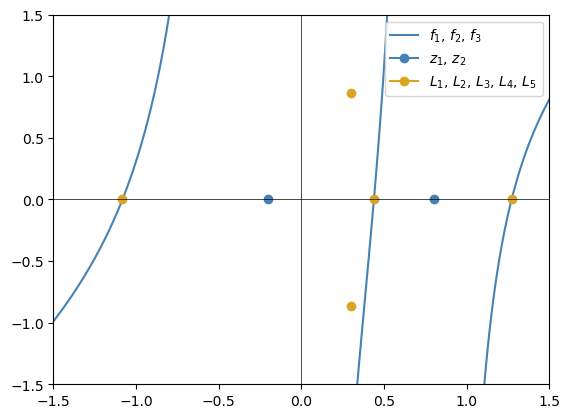

In [2]:
# Definición de la "Sub-Masa" :v
mu = 0.2

#---POTENCIAL 1---
def f1(x, mu):
    return x - (1 - mu) / (x + mu) ** 2 + mu / (x + mu - 1) ** 2
    
#---POTENCIAL 2---#
def f2(x, mu):
    return x - (1 - mu) / (x + mu) ** 2 - mu / (x + mu - 1) ** 2

#---POTENCIAL 3---#
def f3(x, mu):
    return x + (1 - mu) / (x + mu) ** 2 + mu / (x + mu - 1) ** 2

# Dominios
dominio1 = np.linspace(-0.01, 0.7, 100)
dominio2 = np.linspace(0.9, 1.7, 100)
dominio3 = np.linspace(-2.2, -0.4, 100)

# El potencial en esos dominios
potencial1 = [f1(i,mu) for i in dominio1]
potencial2 = [f2(i,mu) for i in dominio2]
potencial3 = [f3(i,mu) for i in dominio3]

# Calcular los puntos de Lagrange
l1 = root_scalar(f1, args=(mu,),bracket=(-0.1,0.5))
l2 = root_scalar(f2, args=(mu,),bracket=(1.0,1.5))
l3 = root_scalar(f3, args=(mu,),bracket=(-2.2,-0.5))

#------------------------#
#---PUNTOS DE LAGRANGE---#
#------------------------#
L1 = (l1.root, 0)
L2 = (l2.root, 0)
L3 = (l3.root, 0)
L4 = (0.5-mu,sqrt(3)/2)
L5 = (0.5-mu,-sqrt(3)/2)

# Imprimirlos
print("L1 = ", L1)
print("L2= ", L2)
print("L3 = ", L3)
print("L4 = ", L4)
print("L5 = ", L5)

#-------------#
#---Gráfica---#
#-------------#

plt.plot(dominio1,potencial1, label=r"$f_1$, $f_2$, $f_3$", color='steelblue')
plt.plot(dominio2,potencial2, color='steelblue')
plt.plot(dominio3,potencial3, color='steelblue')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

#---Cuerpos Primarios---
plt.plot(-mu,0, marker="o", label=r'$z_1$, $z_2$', color='steelblue')
plt.plot(1-mu,0, marker="o", color='steelblue')

# Visualización de los puntos de Lagrange
plt.plot(L1[0], L1[1], marker="o", label=r'$L_1$, $L_2$, $L_3$, $L_4$, $L_5$', color='goldenrod')
plt.plot(L2[0], L2[1], marker="o", color='goldenrod')
plt.plot(L3[0], L3[1], marker="o", color='goldenrod')
plt.plot(L4[0], L4[1], marker="o", color='goldenrod')
plt.plot(L5[0], L5[1], marker="o", color='goldenrod')

#---Ejes---
plt.axhline(0, color='black', linewidth=0.5)  # Marca el eje y
plt.axvline(0, color='black', linewidth=0.5)  # Marca el eje x

plt.legend()

### 2.- Solución al sistema

La trayectoria del cuerpo secundario, cuya masa es $m_3$, obedece al siguiente sistema de ecuaciones:

$$ x'' - 2y' = \partial_x \Phi $$

$$ y'' + 2x' = \partial_y \Phi $$

Las masas de los cuerpos primarios cumplen $m_1+m_2 = 1$ y escribimos todo en términos de $\mu = m_2$. 

$z_1 = (-\mu,0)$ 

$z_2 = (1-\mu,0)$ 

El gradiente del potencial es:

$$ \nabla \Phi(x,y) = (x,y) - \dfrac{1-\mu}{|z-z_1|^3}(x+\mu, y) - \dfrac{\mu}{|z-z_2|^3}(x+\mu-1,y) $$

en donde:

$$ |z-z_1|^3 = [(x+\mu)^2+y^2]^{3/2} $$

$$ |z-z_2|^3 = [(x+\mu-1)^2+y^2]^{3/2} $$

y así, el sistema queda como:

$ x'' = 2y' + x - \dfrac{1-\mu}{|z-z_1|^3}(x+\mu)-\dfrac{\mu}{|z-z_2|^3}(x+\mu-1) $

$ y'' = -2x' + y - \dfrac{1-\mu}{|z-z_1|^3}(y)-\dfrac{\mu}{|z-z_2|^3}(y)  $

el cual resolveremos planteándolo como un sistema de primer orden.

$ x' = v_x $

$ v_x' = 2v_y + x - \dfrac{1-\mu}{|z-z_1|^3 }(x+\mu)-\dfrac{\mu}{|z-z_2|^3 }(x+\mu-1) $

$ y' = v_y $

$ v_y' = -2v_x + y - \dfrac{1-\mu}{|z-z_1|^3 }(y)-\dfrac{\mu}{|z-z_2|^3 }(y)  $

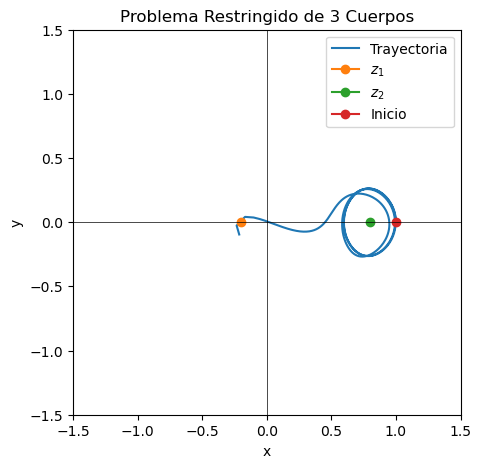

In [3]:
#--------------------------------------------#
#---Las Ecuaciones y sus Valores Iniciales---#
#--------------------------------------------#

def S(t, z, mu):
    x, vx, y, vy = z
    z_z1 = sqrt((x+mu)**2 + y**2) # z-z1
    z_z2 = sqrt((x+mu-1)**2 + y**2) # z-z2
    #-------------------------------------
    dx = vx
    dvx = 2*vy + x -(1-mu)*(x+mu)/(z_z1**3) - mu*(x+mu-1)/(z_z2**3)
    dy = vy
    dvy = -2*vx + y -(1-mu)*(y)/(z_z1**3) - mu*(y)/(z_z2**3)
    #--------------------------------------------------------------
    return [dx, dvx, dy, dvy]

# Posiciones y velocidades iniciales
x0 = 1.0
vx0 = 0.0
y0 = 0.0
vy0 = 0.9

#-------------#
#---Dominio---#
#-------------#
t0 = 0.0
tf = 8.0
N = 500

# Esto es una solución pero quién sabe con cuántos puntos
sol = solve_ivp(S, [t0, tf], [x0, vx0, y0,vy0], args=(mu,), dense_output=True)

# Definiéndo ésto ya especifícas cuántos puntos quieres
t = np.linspace(t0, tf, N)
z = sol.sol(t)

x = z[0]
vx = z[1]
y = z[2]
vy = z[3]

# Graficamos
plt.figure(figsize=(5,5))
# Ajuste de límites para hacer que los ejes tengan el mismo intervalo
max_range = max(max(x), max(y)) * 1.1
#plt.xlim(-max_range, max_range)
#plt.ylim(-max_range, max_range)

# Habilita ésto para visualizar los puntos de Lagrange
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.plot(x, y, label='Trayectoria')

#---Cuerpos Primarios---
plt.plot(-mu,0, marker="o", label=r'$z_1$')
plt.plot(1-mu,0, marker="o", label=r'$z_2$')

# Posición Inicial
plt.plot(x0, y0, marker="o", label='Inicio')

#---Ejes---
plt.axhline(0, color='black', linewidth=0.5)  # Marca el eje y
plt.axvline(0, color='black', linewidth=0.5)  # Marca el eje x
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.title('Problema Restringido de 3 Cuerpos')
plt.show()

### 3.- A continuación muestro una gráfica del potencial y algunas curvas de nivel

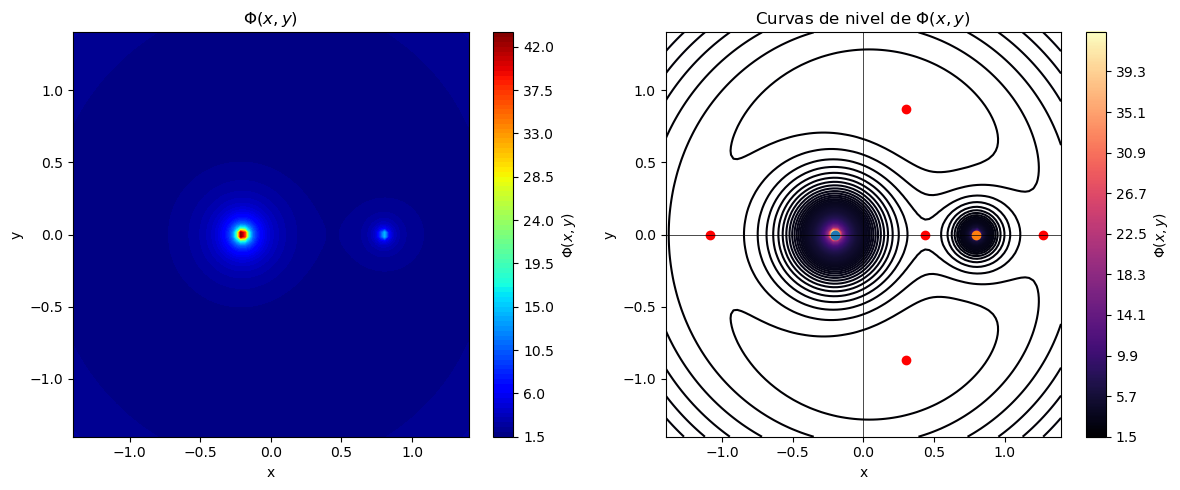

In [29]:
# Definimos el potencial
def Phi(x, y, mu):
    return 0.5*(x**2 + y**2) + (1-mu)/np.sqrt((x+mu)**2+y**2) + mu/np.sqrt((x+mu-1)**2+y**2) + 0.5*mu*(1-mu)

# Crear valores para x, y
x_phi = np.linspace(-1.4, 1.4, 100)
y_phi = np.linspace(-1.4, 1.4, 100)
X, Y = np.meshgrid(x_phi, y_phi) # cuadrícula de puntos (x, y)

# Calcular los valores de Phi(x, y) para cada punto de la cuadrícula
Z = Phi(X, Y, mu)

# Crear una figura y una matriz de subgráficos 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Trazar la gráfica de contorno con relleno en el primer subgráfico
contour_plot = axs[0].contourf(X, Y, Z, cmap='jet', levels=85)
fig.colorbar(contour_plot, ax=axs[0], label=r'$\Phi(x,y)$')  # Añadir una barra de color para referencia
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title(r'$\Phi(x,y)$')

# Trazar las curvas de nivel en el segundo subgráfico
contour_plot = axs[1].contour(X, Y, Z, cmap='magma', levels=400)
fig.colorbar(contour_plot, ax=axs[1], label=r'$\Phi(x,y)$')  # Añadir una barra de color para referencia con notación LaTeX

#---Cuerpos Primarios---
plt.plot(-mu,0, marker="o", label='z1')
plt.plot(1-mu,0, marker="o", label='z2')

# Puntos de Lagrange
lagrange_color = 'red'
plt.plot(L1[0], L1[1], marker="o", label=r'$L_1$, $L_2$, $L_3$, $L_4$, $L_5$', color=lagrange_color)
plt.plot(L2[0], L2[1], marker="o", color=lagrange_color)
plt.plot(L3[0], L3[1], marker="o", color=lagrange_color)
plt.plot(L4[0], L4[1], marker="o", color=lagrange_color)
plt.plot(L5[0], L5[1], marker="o", color=lagrange_color)

#---Ejes---
plt.axhline(0, color='black', linewidth=0.5)  # Marca el eje y
plt.axvline(0, color='black', linewidth=0.5)  # Eje x

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title(r'Curvas de nivel de $\Phi(x,y)$')

plt.tight_layout()
plt.show()

display(HTML("<div style='text-align:center;'><img src='potencial.jpg' /></div>"))

### 4.- Constante de Jacobi y Región de Hill

la constante de Jacobi está dada por:

$$C = 2\Phi(x,y) - (x'^2 + y'^2)$$

Mientras que la región de Hill por:

$$ H = \{ (x,y)\in \mathcal{R}^2-\{z_1,z_2\}: 2\Phi(x,y)-C\geq 0 \} $$

La constante de Jacobi es: 3.684994059646817


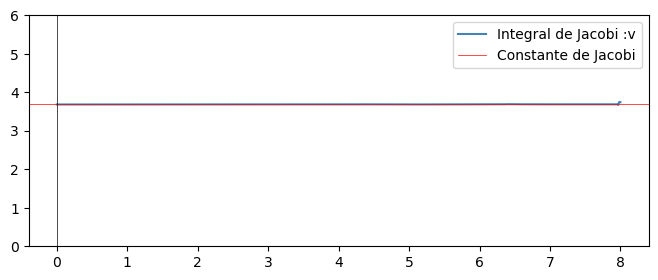

In [5]:
def Jacobi(x, y, vx, vy, mu):
    return 2*Phi(x, y, mu)-(vx**2 + vy**2)

C = [Jacobi(i, j, k, l, mu) for (i,j,k,l) in zip(x, y, vx, vy)]

#-------------------------#
#---Ajuste de constante---#
#-------------------------#

# Definimos una función constante para ajustarla a nuestros datos
def constante(t, const):
    return const 

# Realizamos el ajuste de curva
popt, pcov = curve_fit(constante, t, C)
constante_jacobi = popt[0]

print("La constante de Jacobi es:", constante_jacobi)

#-------------#
#---Gráfica---#
#-------------#

plt.figure(figsize=(8,3))
plt.plot(t,C, label='Integral de Jacobi :v', color='steelblue')
plt.axhline(constante_jacobi, color='red', linewidth=0.5, label='Constante de Jacobi')  # Marca la Constante de Jacobi

plt.ylim(0.0, 6)

#---Ejes---
plt.axhline(0, color='black', linewidth=0.5)  # Marca el eje y
plt.axvline(0, color='black', linewidth=0.5)  # Marca el eje x

plt.legend()

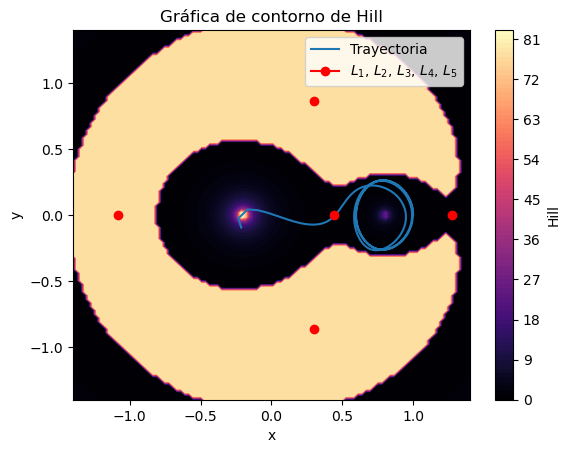

In [54]:
# Definimos el potencial
def H(x, y, mu):
    return 2*Phi(x, y, mu)-constante_jacobi

# Calculamos la Región
Rapel = H(X,Y,mu)

#--------------------#
#---Región de Hill---#
#--------------------#
Hill = prueba2 = [[78 if elemento < 0 else elemento for elemento in fila] for fila in Rapel] # El 64 es para darle color a esa zona

# Gráfica con el gradiente de colores y barra de colores
plt.contourf(X, Y, Hill, cmap='magma', levels = 100)
plt.colorbar(label='Hill') 

# Trayectoria de la prueba
plt.plot(x, y, label='Trayectoria')

# Puntos de Lagrange
lagrange_color = 'red'
plt.plot(L1[0], L1[1], marker="o", label=r'$L_1$, $L_2$, $L_3$, $L_4$, $L_5$', color=lagrange_color)
plt.plot(L2[0], L2[1], marker="o", color=lagrange_color)
plt.plot(L3[0], L3[1], marker="o", color=lagrange_color)
plt.plot(L4[0], L4[1], marker="o", color=lagrange_color)
plt.plot(L5[0], L5[1], marker="o", color=lagrange_color)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de contorno de Hill')
plt.legend()
plt.show()

De acuerdo a Geiges, si uno resuelve el problema 7.11 podrá encontrar que el mínimo del potencial es $3/2$ y que se adquiere ese valor en los puntos $L_4$ y $L_5$. Vamos a verlo.

Si no coinciden es porque el punto de lagrange no está en la malla pero en ella hay puntos cercanos a él.

In [55]:
minimos = [] 
for i in range(len(Z)):
    minimos.append(min(Z[i]))

print(min(minimos)) # El mínimo de mínimos,

# El potencial evaluado en L4 y L5
Phi(L4[0],L4[1],mu)
Phi(L5[0],L5[1],mu)

1.5000245295419854


1.5000000000000002